# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 

## Get the data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-09 12:31:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-09-09 12:31:22 (5.86 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
# import with pandas
import pandas as pd 
# let's read in our data 
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ['Date'],
                 index_col = ["Date"]) # parse the Date column and let pandas know it is date_time
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples do we have
len(df)

2787

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {"Closing Price (USD)" : "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


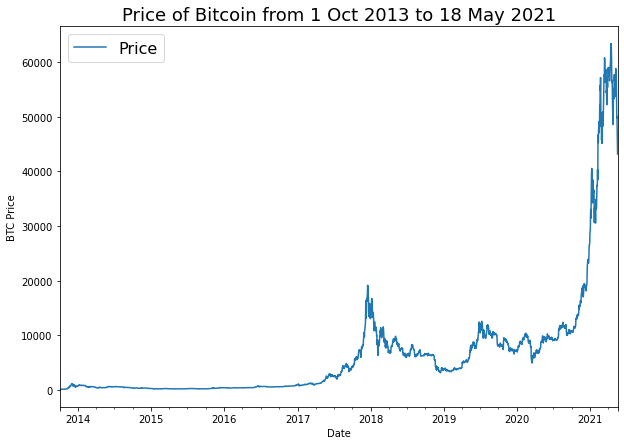

In [ ]:
bitcoin_prices.plot.line(figsize = (10,7));
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 18)
plt.legend(fontsize = 16)

## Importing time series data with Python's CSV module

In [ ]:
# importing and formatting historical Bitcoin data with Python
import csv 
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 'r') as f:
  csv_reader = csv.reader(f, delimiter =",")
  next(csv_reader) # skips first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates not strings
    btc_price.append(float(line[2]))

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

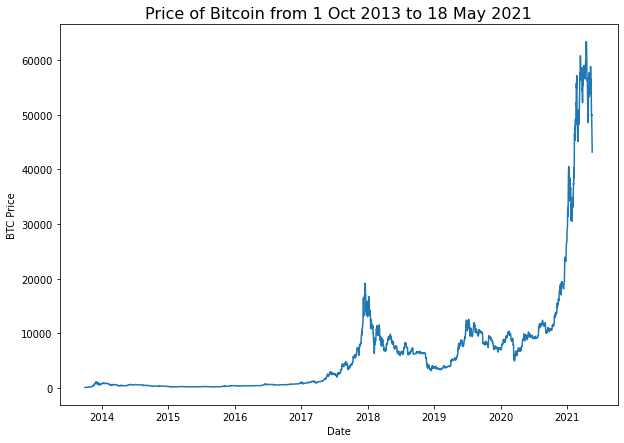

In [ ]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize =  (10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16);

## Format data part 1: Create train and test sets of our time series data 

### Creating train and test sets with time series data (the wrong way)

In [ ]:
# Get bitcoin date array 
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, 
                                                    prices, 
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

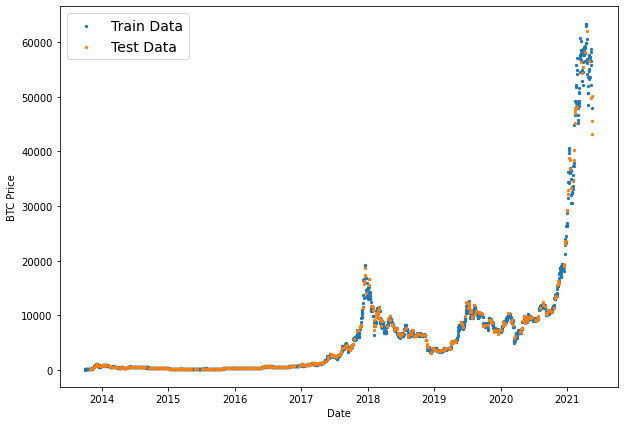

In [ ]:
# Let's plot the wrong training data 
plt.figure(figsize =(10, 7))
plt.scatter(X_train, y_train, s =5, label = "Train Data" )
plt.scatter(X_test, y_test, s =5, label = "Test Data" )
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

The above is the wrong way to split the train and test data because the "past" gets mixed with the "future" so it becomes impossible to make accurate predictions of prices.

In [ ]:
# Create train and test splits the right way for time series data 
split_size = int(0.8 * len(prices))

# Create train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits 
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

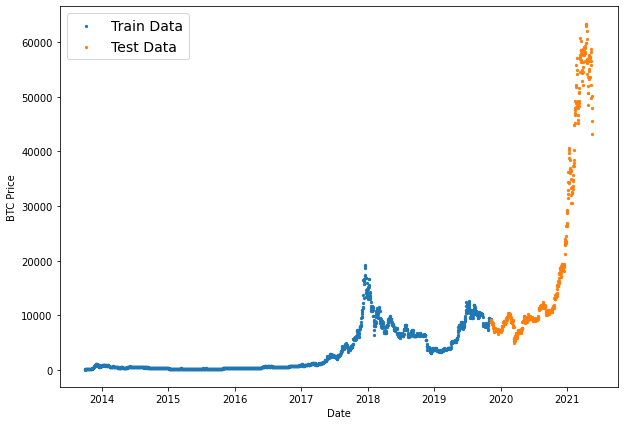

In [ ]:
# Let's plot the wrong training data 
plt.figure(figsize =(10, 7))
plt.scatter(X_train, y_train, s =5, label = "Train Data" )
plt.scatter(X_test, y_test, s =5, label = "Test Data" )
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

## Create a plotting functions

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format =".", start=0, end =None, label = None):
  """ 
  Plots timesteps (a series of points in time) against valuues (a series of values across time)

  Parameters
  ----------
  timesteps: array of datetime values 
  values: array of values of across time
  format : style of plot, default is "." (scatter)
  start : where to start the plot (setting a values will index start point of timesteps)
  end : where to end the plot (similar to start but for the end of the timesteps)
  label : label to show on plot aboutu values
  """
  
  plt.plot(timesteps[start:end], values[start:end], format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) 
  plt.grid(True)


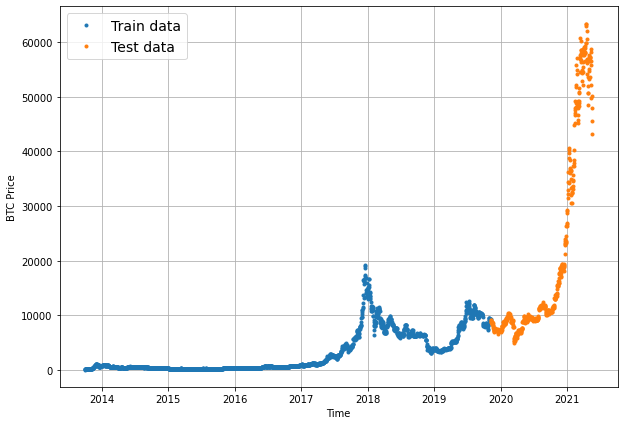

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps= X_train, values = y_train, label ="Train data")
plot_time_series(timesteps= X_test, values = y_test, label ="Test data")


## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's ruun a series of modelling experiments and see which model performs the best.

0. Naive Model (baseline)
1. Dense Model ( horizon = 1, window = 7)
2. Same as Model 1 (horizon = 1, window = 30)
3. Same as Model 1 (horizon =7, window 30) 
4. Conv1D
5. LSTM 
6. Same as model 1 but with multivariate data
7. N-BEATS algorithm 
8. Ensemble (multiple models stacked together)
9. Future Prediction Model 
10. Same as model1 (but with turkey data introduced)

Terms to be familiar with: 
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timsteps we're going to use to predict **horizon**

### Model 0: Naive baseline model 

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

The prediction at the next timestep t (y-hat) is equal to the value at timestep t-1

In [ ]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

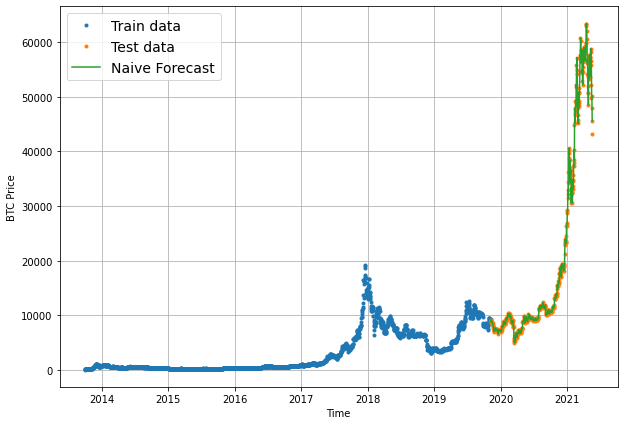

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series(timesteps = X_test, values = y_test, label = 'Test data')
plot_time_series(timesteps = X_test[1:], values= naive_forecast, format ="-", label = "Naive Forecast" );

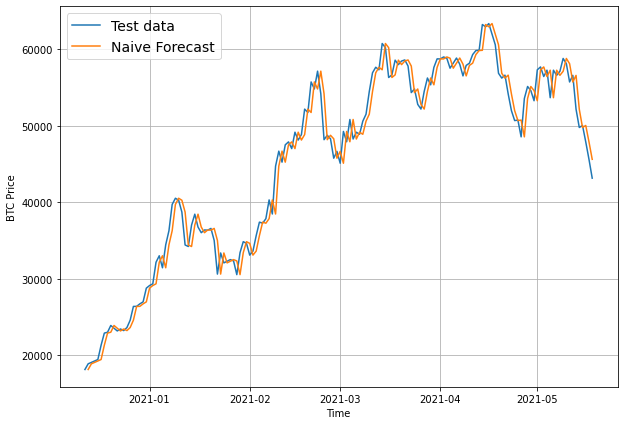

In [ ]:
plt.figure(figsize=(10,7))
#plot_time_series(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series(timesteps = X_test, values = y_test, start = 400,format ="-", label = 'Test data')
plot_time_series(timesteps = X_test[1:], values= naive_forecast, start = 400, format ="-", label = "Naive Forecast" );

#### Evaluating a time series model 

Let's look into some evaluation metrics for time series forecasting. 

What are we doing?

We're predicting a number . That means its a form of a regression probelm. 

A few common regression metrics (which can also be used for time series forecasting)
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MAPE - symmetric mean absolute perentage error 
* MASE - mean absolute scaled error 

The main thing we're evaluating here is how well our y_predict is to y_true

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE for test data
  """
  mae = tf.reduce_mean(tf.abs(y_true -y_pred))

  # Find MAE of naive forecast (no seas)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evaluations
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype for metric calculations
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  # calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#### Other models you can use for baselines and for actual forecast

In this notebook, we're focused on TensorFlow and deep learning models. 

However, there are others that you may want to look into for building baselines. 

Model/Library Name	Resource
* Moving average
  -	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

* ARIMA (Autoregression Integrated Moving Average)
  -	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
sktime (Scikit-Learn for time series)	https://github.com/alan-turing-institute/sktime
* TensorFlow Decision Forests (random forest, gradient boosting trees)
  -	https://www.tensorflow.org/decision_forests
* Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)	
  - https://github.com/facebookresearch/Kats
LinkedIn Greykite (flexible, intuitive and fast forecasts)	https://github.com/linkedin/greykite

## Format Data Part 2: Windowing our dataset 

Why do we window? 

We window to turn out timeseries problem into a supervised learning problem

In [ ]:
print(f"We want to use {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # we want to predict the next 1 day 
WINDOW_SIZE = 7 # we want to use the past week of data to make the prediction 

In [ ]:
# Create function to label windowed data 
def get_labelled_window(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset

  E.g. if horizon =1 
  Input: [0, 1, ,2 ,3 ,4 ,5 6] 
  Output : ([0, 1, ,2 ,3 ,4 ,5 6] , [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test window funciton 
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


We've got a way to label our windowed data, however this only works on a small scale. 

We need a way to do the above across our entire time series. 

In [ ]:
# Create function to view numpy arrays as windows
def make_window(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """ 
  Turns a 1D array into a 2D array of sequential labelled window of window_size with horizon size labels
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis =0) 
  
  # 2. Create a 2D array of multipe window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T  # create 2D array of window of window size 

  #print(f"Window indexes: \n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps 
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows 
  windows, labels = get_labelled_window(windowed_array, horizon = horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_window(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/ labels
for i in range(3):
  print(f"Windows: {full_windows[i]} -> Labels: {full_labels[i]}")

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Labels: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Labels: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Labels: [125.96116]


In [ ]:
# View the last 3 
for i in range(3):
  print(f"Windows: {full_windows[i-3]} -> Labels: {full_labels[i-3]}")

Windows: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Labels: [47885.62525472]
Windows: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Labels: [45604.61575361]
Windows: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Labels: [43144.47129086]


Note: There is a function built-in to TensorFlow that does the same 
as the function we made from scratch 

tf/keras/preprocessing/timeseries_dataset_from_array

#### Turning Windows into training and testsets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split = 0.2):
  """ 
  Splits matching pairs of windows and labels into train and test spltis
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/ 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
len(train_windows) , len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], test_windows[:5], train_labels[:5], test_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to appels. 

More specificially we want to compare each of our model's best performances against the other mdoel's best performances

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

### Model 1: Dense model (window  =7, horizon = 1)

Our first deep model is going to be a simple dense model: 
* A single dense layer with 128 hidden units and ReLU 
* An output layer with linear activation (no activation) 
* Adam optimization and MAE loss function 
* Batch size of 128 (previously we've used 32)
* 100 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# set random seed for reprodocuible results
tf.random.set_seed(42)

 # 1. construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear') # linear activation is the same as having no activation 
], name = 'model_1_dense')

# 2. Compile
model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# 3. Fit the model 
model_1.fit(x = train_windows, 
            y = train_labels, 
            epochs = 100, 
            verbose = 1, 
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)]) 

Epoch 1/100
18/18 [==============================] - 4s 43ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 158.5

In [ ]:
naive_results 

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [ ]:
model_1= tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

#### Making forecast with a model (on the test datasets)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecasts are into  the future)

Let's write a function to:
1. Take in a train model 
2. Takes in some input data 
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D aarray of predictions

In [ ]:
# Make predictions using model_1 on the test dataset 
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = model_1_preds)

model_1_results 

{'mae': 568.9511,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.99948955}

In [ ]:
naive_results 

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

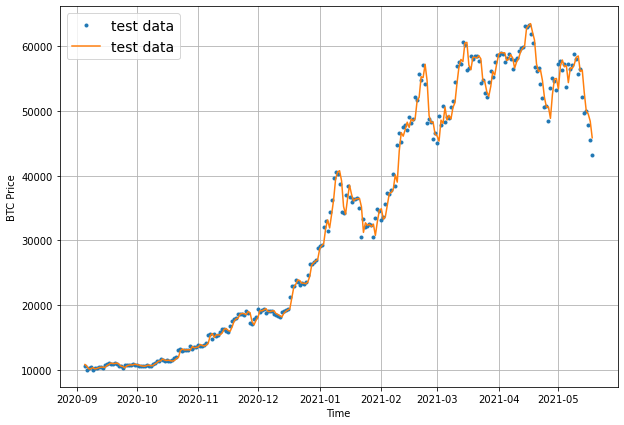

In [ ]:
# Let's plot model 1 predictions
offset = 300 
plt.figure(figsize = (10,7))
# Account for the test_window offset and index into test_labels to ensurue correct plotting 
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:,],
                 start = offset,
                 label = "test data")

plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "test data")

### Model 2: Same as model 1 but with (horizon = 1, window = 30)

In [ ]:
full_windows, full_labels = make_window(prices, window_size= 30)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
train_windows.shape, test_window.shape

((2205, 30), TensorShape([1, 7]))

In [ ]:
 # set random seed for reprodocuible results
tf.random.set_seed(42)

 # 1. construct model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear') # linear activation is the same as having no activation 
], name = 'model_2_dense')

# 2. Compile
model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# 3. Fit the model 
model_2.fit(x = train_windows, 
            y = train_labels, 
            epochs = 100, 
            verbose = 1, 
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 34ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741506.0000 - val_loss: 3900.2537 - val_mae: 3900.2537 - val_mse: 32752730.0000
Epoch 2/100
18/18 [==============================] - 1s 39ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.2500 - val_loss: 1587.0745 - val_mae: 1587.0745 - val_mse: 6817661.5000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0625 - val_loss: 1220.6888 - val_mae: 1220.6888 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837504.2500
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0312 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.0000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss

In [ ]:
# Get the epoch where the model had the best weights
model_2= tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [ ]:
# Make predictions using model_2 on the test dataset 
model_2_preds = make_preds(model_2, test_windows)
len(model_2_preds), model_2_preds[:10]

(552, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8882.84  , 8904.423 , 8762.442 , 8559.087 , 8428.983 , 8327.641 ,
        8256.728 , 8126.8335, 8171.7334, 7796.058 ], dtype=float32)>)

In [ ]:
# Get model 2 results
# Evaluate preds
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = model_2_preds)

model_2_results 

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

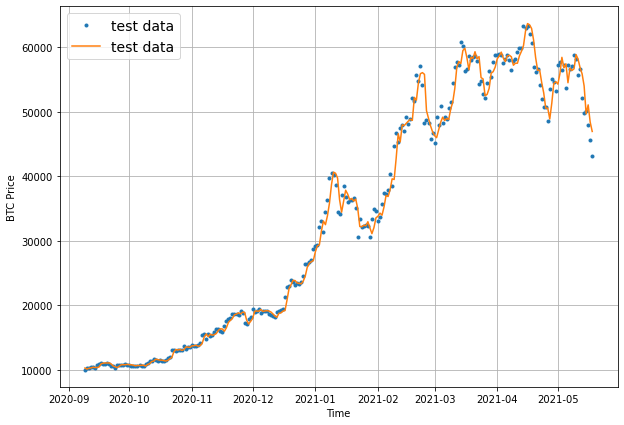

In [ ]:
# Let's plot model 2 predictions
offset = 300 
plt.figure(figsize = (10,7))
# Account for the test_window offset and index into test_labels to ensurue correct plotting 
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:,],
                 start = offset,
                 label = "test data")

plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = model_2_preds,
                 start = offset,
                 format = "-",
                 label = "test data")

### Model 3: Same as model 1 but with (horizon =7, window 30) 

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_window(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# Get the best weights of the model 
model_3= tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [ ]:
# Make predictions using model_3 on the test dataset 
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.89  , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [ ]:
# Get model 3 results
# Evaluate preds
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = model_3_preds)

model_3_results 

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.66156 ,  485.9228  ,  584.49713 ,  687.3824  ,
         836.2264  ,  755.1576  ,  731.4958  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80225 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.941124,
          54.825542,   73.79548 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57191 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98123 ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

#### Make our evaluate preds function work for multiple dimensions

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_true, y_pred))
    mse = tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_true, y_pred))
    rmse = tf.reduce_mean(tf.sqrt(mse))
    mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred))
    mase = tf.reduce_mean(mean_absolute_scaled_error(y_true, y_pred))

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model 3 results
# Evaluate preds
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = model_3_preds)

model_3_results 

{'mae': 1237.5065,
 'mse': 5405198.5,
 'rmse': 2324.9082,
 'mape': 5.558879,
 'mase': 2.2020733}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.89  , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

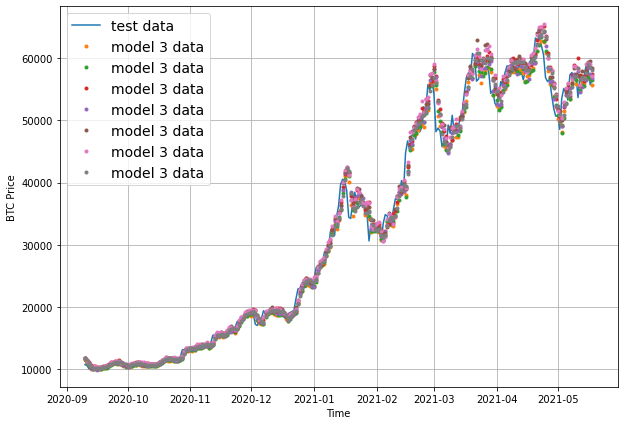

In [ ]:
# Let's plot model 2 predictions
offset = 300 
plt.figure(figsize = (10,7))
# Account for the test_window offset and index into test_labels to ensurue correct plotting 
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:,0],
                 start = offset,
                 format = "-",
                 label = "test data")

plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = model_3_preds,
                 start = offset,
                 label = "model 3 data")

In [ ]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
       9357.3545], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9306.821>

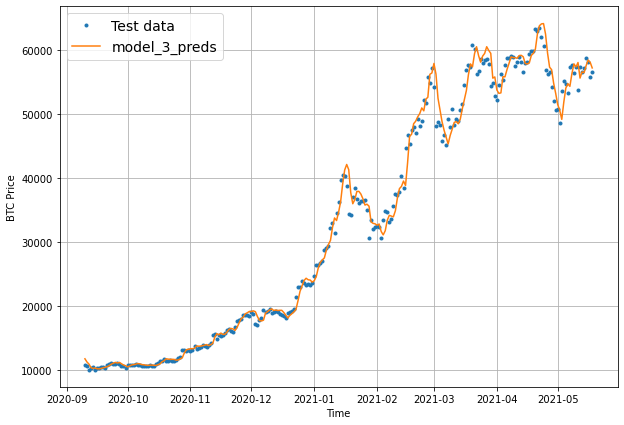

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format=".",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

### Comparing our models so far

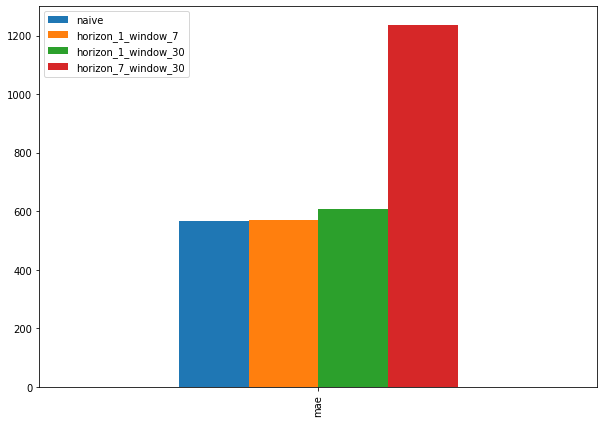

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4: Conv1D

In [ ]:
HORIZON = 1 # Predict next day of price
WINDOW_SIZE = 7  # use last week of data 

In [ ]:
full_windows, full_labels = make_window(prices, window_size = WINDOW_SIZE, horizon= HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

We need an input shape of : `(batch_size, timesteps, input_dim)`

In [ ]:
# Check data input shape 
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works 
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))

In [ ]:
print(f"Original shape : {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")

Original shape : (7,)
Expanded shape: (7, 1)


In [ ]:
# Create Conv1D model 
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x, axis =1)),
    layers.Conv1D(filters = 128, kernel_size= WINDOW_SIZE, padding = 'causal', activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_4_conv1D')

# Compile
model_4.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

# Fit 
model_4.fit(train_windows, 
            train_labels, 
            batch_size = 128, 
            epochs = 100, 
            verbose = 0, 
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

In [ ]:
# Get the best weights of the model 
model_4= tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 570.7388


570.73876953125

In [ ]:
# Make predictions using model_3 on the test dataset 
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8893.429, 8788.89 , 9020.29 , 8796.402, 8743.089], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)

model_4_results

{'mae': 570.7388,
 'mse': 1183499.9,
 'rmse': 1087.8878,
 'mape': 2.5461204,
 'mase': 1.00263}

### Model 5: RNN (LSTM)

In [ ]:
# Let's build an LSTM model 
tf.random.set_seed(42)

# Let's build a functional model 
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation = 'relu', return_sequences= True)(x)
x = layers.LSTM(128, activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs= inputs, outputs = output, name = 'model_5_LSTM')

# Compile
model_5.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

# Fit the model 
model_5.fit(train_windows, 
            train_labels, 
            epochs =100, 
            verbose = 1, 
            batch_size = 128, 
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name= model_5.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 2792.3955

18/18 [==============================] - 7s 291ms/step - loss: 2674.6548 - val_loss: 11771.3379
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 883.2722

18/18 [==============================] - 4s 218ms/step - loss: 883.2722 - val_loss: 2485.7461
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 257.6387

18/18 [==============================] - 3s 183ms/step - loss: 236.8104 - val_loss: 976.7570
Epoch 4/100
18/18 [==============================] - 0s 12ms/step - loss: 175.6387 - val_loss: 1050.8646
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 179.0793

18/18 [==============================] - 3s 202ms/step - loss: 174.1226 - val_loss: 961.5504
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 175.4817 - val_loss: 975.6950
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 176.8983

18/18 [==============================] - 3s 183ms/step - loss: 169.8881 - val_loss: 957.4248
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 164.7579

18/18 [==============================] - 3s 182ms/step - loss: 167.5093 - val_loss: 923.8943
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 167.0310 - val_loss: 963.4691
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 160.3703

18/18 [==============================] - 4s 210ms/step - loss: 163.7470 - val_loss: 903.1186
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 167.0076

18/18 [==============================] - 3s 185ms/step - loss: 161.1393 - val_loss: 894.1668
Epoch 12/100
18/18 [==============================] - 0s 12ms/step - loss: 160.1854 - val_loss: 1196.1001
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 167.3986

18/18 [==============================] - 3s 205ms/step - loss: 166.6464 - val_loss: 880.6729
Epoch 14/100
18/18 [==============================] - 0s 11ms/step - loss: 156.6932 - val_loss: 933.6056
Epoch 15/100
18/18 [==============================] - 0s 10ms/step - loss: 155.8989 - val_loss: 888.3635
Epoch 16/100
13/18 [====================>.........] - ETA: 0s - loss: 154.1236

18/18 [==============================] - 3s 184ms/step - loss: 151.7627 - val_loss: 859.3471
Epoch 17/100
18/18 [==============================] - 0s 11ms/step - loss: 150.9177 - val_loss: 873.1931
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 157.5061

18/18 [==============================] - 3s 203ms/step - loss: 150.3698 - val_loss: 850.9774
Epoch 19/100
18/18 [==============================] - 0s 12ms/step - loss: 145.0383 - val_loss: 859.0473
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 148.5147

18/18 [==============================] - 3s 188ms/step - loss: 146.2674 - val_loss: 789.2773
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 143.0081

18/18 [==============================] - 3s 204ms/step - loss: 144.0670 - val_loss: 783.9039
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 147.4623

18/18 [==============================] - 3s 185ms/step - loss: 139.8859 - val_loss: 770.3443
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 135.7860

18/18 [==============================] - 3s 183ms/step - loss: 137.4825 - val_loss: 759.0625
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 136.5553

18/18 [==============================] - 4s 228ms/step - loss: 137.2546 - val_loss: 748.0524
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 139.8056

18/18 [==============================] - 6s 335ms/step - loss: 134.3447 - val_loss: 736.9557
Epoch 26/100
16/18 [=========================>....] - ETA: 0s - loss: 134.2775

18/18 [==============================] - 4s 240ms/step - loss: 132.5973 - val_loss: 726.9816
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 133.3166

18/18 [==============================] - 3s 186ms/step - loss: 130.7870 - val_loss: 720.3467
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 128.0483

18/18 [==============================] - 4s 215ms/step - loss: 127.9702 - val_loss: 719.9833
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 129.5760

18/18 [==============================] - 3s 185ms/step - loss: 126.9464 - val_loss: 703.5516
Epoch 30/100
18/18 [==============================] - 0s 11ms/step - loss: 145.7746 - val_loss: 863.8830
Epoch 31/100
18/18 [==============================] - 0s 11ms/step - loss: 175.3698 - val_loss: 716.6548
Epoch 32/100
18/18 [==============================] - 0s 11ms/step - loss: 128.0695 - val_loss: 719.6708
Epoch 33/100
18/18 [==============================] - 0s 11ms/step - loss: 127.1343 - val_loss: 782.0281
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 132.2894

18/18 [==============================] - 4s 261ms/step - loss: 128.2473 - val_loss: 674.3144
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 121.2617

18/18 [==============================] - 9s 498ms/step - loss: 121.2617 - val_loss: 659.0309
Epoch 36/100
18/18 [==============================] - 0s 24ms/step - loss: 124.7149 - val_loss: 668.2896
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 120.2013

18/18 [==============================] - 6s 349ms/step - loss: 121.2191 - val_loss: 646.5801
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 119.5277

18/18 [==============================] - 8s 466ms/step - loss: 119.3296 - val_loss: 646.5583
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 119.6737

18/18 [==============================] - 3s 186ms/step - loss: 119.6737 - val_loss: 638.7875
Epoch 40/100
18/18 [==============================] - 0s 11ms/step - loss: 120.1795 - val_loss: 641.7059
Epoch 41/100
18/18 [==============================] - 0s 10ms/step - loss: 120.6711 - val_loss: 643.8541
Epoch 42/100
18/18 [==============================] - 0s 11ms/step - loss: 135.9133 - val_loss: 681.4673
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 116.0678

18/18 [==============================] - 4s 212ms/step - loss: 120.4223 - val_loss: 634.6816
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 117.1026

18/18 [==============================] - 5s 322ms/step - loss: 117.3304 - val_loss: 623.3199
Epoch 45/100
18/18 [==============================] - 0s 12ms/step - loss: 117.4262 - val_loss: 624.6231
Epoch 46/100
13/18 [====================>.........] - ETA: 0s - loss: 122.1925

18/18 [==============================] - 5s 299ms/step - loss: 118.6867 - val_loss: 621.6507
Epoch 47/100
18/18 [==============================] - 0s 21ms/step - loss: 117.3858 - val_loss: 688.9976
Epoch 48/100
18/18 [==============================] - 0s 16ms/step - loss: 117.6042 - val_loss: 653.6076
Epoch 49/100
18/18 [==============================] - 0s 21ms/step - loss: 118.4903 - val_loss: 623.4806
Epoch 50/100
16/18 [=========================>....] - ETA: 0s - loss: 116.6957

18/18 [==============================] - 5s 315ms/step - loss: 119.2379 - val_loss: 610.6932
Epoch 51/100
18/18 [==============================] - 0s 20ms/step - loss: 118.4732 - val_loss: 622.5924
Epoch 52/100
18/18 [==============================] - 0s 23ms/step - loss: 125.6308 - val_loss: 624.2097
Epoch 53/100
18/18 [==============================] - 0s 14ms/step - loss: 122.5046 - val_loss: 612.0981
Epoch 54/100
18/18 [==============================] - 0s 16ms/step - loss: 117.8437 - val_loss: 659.7522
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 118.5064

18/18 [==============================] - 5s 267ms/step - loss: 116.9031 - val_loss: 603.8240
Epoch 56/100
18/18 [==============================] - 0s 19ms/step - loss: 114.1766 - val_loss: 770.1930
Epoch 57/100
18/18 [==============================] - 0s 17ms/step - loss: 128.0773 - val_loss: 692.6638
Epoch 58/100
18/18 [==============================] - 0s 11ms/step - loss: 120.9243 - val_loss: 630.7837
Epoch 59/100
18/18 [==============================] - 0s 21ms/step - loss: 115.9529 - val_loss: 611.8178
Epoch 60/100
18/18 [==============================] - 0s 22ms/step - loss: 113.3810 - val_loss: 617.5593
Epoch 61/100
17/18 [===========================>..] - ETA: 0s - loss: 115.4270

18/18 [==============================] - 5s 291ms/step - loss: 114.0606 - val_loss: 598.4995
Epoch 62/100
18/18 [==============================] - 0s 22ms/step - loss: 111.8166 - val_loss: 599.5914
Epoch 63/100
18/18 [==============================] - 0s 22ms/step - loss: 116.0012 - val_loss: 624.7755
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 113.4583 - val_loss: 619.8138
Epoch 65/100
18/18 [==============================] - 0s 19ms/step - loss: 116.2404 - val_loss: 607.1382
Epoch 66/100
18/18 [==============================] - ETA: 0s - loss: 113.3891

18/18 [==============================] - 5s 290ms/step - loss: 113.3891 - val_loss: 594.8929
Epoch 67/100
18/18 [==============================] - 0s 10ms/step - loss: 112.0054 - val_loss: 716.7229
Epoch 68/100
18/18 [==============================] - 0s 10ms/step - loss: 117.9015 - val_loss: 678.3232
Epoch 69/100
13/18 [====================>.........] - ETA: 0s - loss: 123.7869

18/18 [==============================] - 3s 181ms/step - loss: 124.5323 - val_loss: 591.5081
Epoch 70/100
18/18 [==============================] - 0s 12ms/step - loss: 123.6899 - val_loss: 645.1218
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 117.5135 - val_loss: 597.9915
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 112.5838 - val_loss: 592.1841
Epoch 73/100
18/18 [==============================] - 0s 11ms/step - loss: 118.3084 - val_loss: 694.2341
Epoch 74/100
18/18 [==============================] - 0s 11ms/step - loss: 112.4094 - val_loss: 592.4356
Epoch 75/100
18/18 [==============================] - 0s 11ms/step - loss: 113.4403 - val_loss: 598.3807
Epoch 76/100
18/18 [==============================] - 0s 11ms/step - loss: 116.2907 - val_loss: 601.2419
Epoch 77/100
18/18 [==============================] - 0s 10ms/step - loss: 111.1338 - val_loss: 596.6949
Epoch 78/100
14/18 [======================>.......] - ETA: 0s - los

18/18 [==============================] - 3s 204ms/step - loss: 114.7868 - val_loss: 585.9117
Epoch 79/100
18/18 [==============================] - 0s 12ms/step - loss: 114.3616 - val_loss: 614.7781
Epoch 80/100
18/18 [==============================] - 0s 11ms/step - loss: 110.3039 - val_loss: 621.9265
Epoch 81/100
13/18 [====================>.........] - ETA: 0s - loss: 109.3018

18/18 [==============================] - 3s 182ms/step - loss: 112.3890 - val_loss: 582.5421
Epoch 82/100
13/18 [====================>.........] - ETA: 0s - loss: 121.2120

18/18 [==============================] - 3s 180ms/step - loss: 118.9269 - val_loss: 581.4113
Epoch 83/100
18/18 [==============================] - 0s 11ms/step - loss: 116.2041 - val_loss: 683.1954
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 115.4742 - val_loss: 611.4099
Epoch 85/100
18/18 [==============================] - 0s 11ms/step - loss: 110.5647 - val_loss: 612.4319
Epoch 86/100
18/18 [==============================] - 0s 12ms/step - loss: 112.1522 - val_loss: 622.8697
Epoch 87/100
18/18 [==============================] - 0s 11ms/step - loss: 108.9175 - val_loss: 612.0582
Epoch 88/100
18/18 [==============================] - 0s 10ms/step - loss: 109.5139 - val_loss: 601.5453
Epoch 89/100
18/18 [==============================] - 0s 12ms/step - loss: 109.3713 - val_loss: 629.6663
Epoch 90/100
18/18 [==============================] - 0s 10ms/step - loss: 120.5757 - val_loss: 653.7297
Epoch 91/100
18/18 [==============================] - 0s 11ms/step 

18/18 [==============================] - 4s 206ms/step - loss: 114.9833 - val_loss: 576.5928
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 122.4815 - val_loss: 657.7027
Epoch 94/100
18/18 [==============================] - 0s 12ms/step - loss: 114.7493 - val_loss: 580.6441
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 108.5959

18/18 [==============================] - 4s 217ms/step - loss: 108.8383 - val_loss: 575.1729
Epoch 96/100
18/18 [==============================] - 0s 12ms/step - loss: 124.9738 - val_loss: 690.5704
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 117.9888 - val_loss: 672.5587
Epoch 98/100
18/18 [==============================] - 0s 10ms/step - loss: 114.5292 - val_loss: 596.0344
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 112.8966

18/18 [==============================] - 3s 203ms/step - loss: 112.8966 - val_loss: 574.0529
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 107.3411 - val_loss: 581.7635


In [ ]:
# Get the best weights of the model 
model_5= tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 574.0529


574.0529174804688

In [ ]:
# Make predictions using model_3 on the test dataset 
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8883.703, 8757.927, 8968.689, 8766.627, 8734.548], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)

model_5_results

{'mae': 574.0529,
 'mse': 1185426.1,
 'rmse': 1088.7727,
 'mape': 2.5847716,
 'mase': 1.0084519}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Turning our uunivariate time series into multivariate data

Before we add a feature ot our time series, what is a feature we can use?

In [ ]:
# Let's make a multivate time series dataset 
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoin halving events to our datasets
block_reward_1 = 50 # 3 january 2009 (this reward isn't in our dataset as our data begins october 2013)
block_reward_2 = 25 # 8 november 2012 
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 may 2020 

# block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block_reward should be 
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# add in block_reward values as a feature to our dataframe 
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


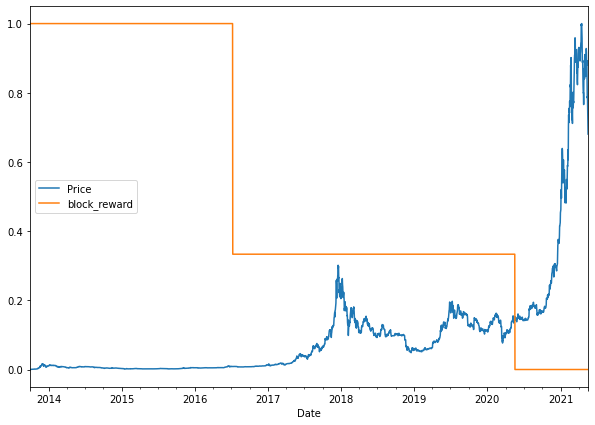

In [ ]:
# Plot the block reward vs price over time 
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize = (10,7))

### Making a windowed dataset with pandas

Previously we turned our univariate time series data into a windowed dataset using the helper functions above however since we've got multivariate data, these functions won't work. 

Instead we will use the pandas.DataFrame.shift function



In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the bitcoin historical data with block reward feature 
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns 
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price +{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price +1,Price +2,Price +3,Price +4,Price +5,Price +6,Price +7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is create a way to window our dataset directly from a pandas dataframe

In [ ]:
# Create x windows and y horizons features
X = bitcoin_prices_windowed.dropna().drop("Price", axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price +1,Price +2,Price +3,Price +4,Price +5,Price +6,Price +7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing 
split_size = int(len(X) * 0.8 )
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### Model 6 : Multivariate model similar to Model 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

 # set random seed for reprodocuible results
tf.random.set_seed(42)

 # 1. construct model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear') # linear activation is the same as having no activation 
], name = 'model_6_dense')

# 2. Compile
model_6.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# 3. Fit the model 
model_6.fit(x = X_train, 
            y = y_train, 
            epochs = 100, 
            verbose = 1, 
            batch_size = 128,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 35ms/step - loss: 1234.6804 - mae: 1234.6804 - mse: 5282005.5000 - val_loss: 2061.9077 - val_mae: 2061.9077 - val_mse: 11377605.0000
Epoch 2/100
18/18 [==============================] - 1s 44ms/step - loss: 351.5053 - mae: 351.5053 - mse: 499358.0312 - val_loss: 1908.6733 - val_mae: 1908.6733 - val_mse: 8719443.0000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 235.4153 - mae: 235.4153 - mse: 276006.8125 - val_loss: 1329.0585 - val_mae: 1329.0585 - val_mse: 4991872.0000
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 208.6112 - mae: 208.6112 - mse: 219502.7188 - val_loss: 1102.1342 - val_mae: 1102.1342 - val_mse: 3934655.5000
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - mae: 196.5770 - mse: 204309.3750 - val_loss: 1107.8474 - val_mae: 1107.8474 - val_mse: 3822059.0000
Epoch 6/100
18/18 [==============================] - 0s 28ms/step - loss

In [ ]:
# Get the best weights of the model 
model_6= tf.keras.models.load_model("model_experiments/model_6_dense/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899 - mae: 567.8899 - mse: 1164816.5000


[567.889892578125, 567.889892578125, 1164816.5]

In [ ]:
# Make predictions using model_6 on the test dataset 
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true = tf.squeeze(y_test),
                                 y_pred = model_6_preds)

model_6_results

{'mae': 567.8899,
 'mse': 1164816.4,
 'rmse': 1079.2666,
 'mape': 2.5460758,
 'mase': 0.99762523}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Model 7 : N-BEATS

#### Building and testing the N-BEATS block layer

Because the N-Beats block layer doesn't exist in tensorflow, we need to subclass the layer

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int, 
               theta_size: int,
               horizon: int, 
               n_neurons: int, 
               n_layers: int, 
               **kwargs): # the **kwargs takes care of all the args of the parent class
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon 
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block Contains stack of 4 fully connected layers each has ReLU activation 
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range (n_layers)]
    # Output of block is a theta layer with linear activation 
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = 'linear', name = 'theta')

  def call(self, inputs):
    x = inputs 
    for layer in self.hidden:
      x = layer(x) 
    theta =self.theta_layer(x)
    # Ouuput the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast 

Let's test our NBeats Block class . To do this we'll make some dummy inputs and outputs

In [ ]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON, 
                                       horizon = HORIZON, 
                                       n_neurons = 128, 
                                       n_layers =4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1 , axis = 0) #input shape to the model has to reflect dense layer input requirements (ndim = 2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model )
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


#### Preparing data for the N-BEATS algorithm using `tf.data`

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+ {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1 )
bitcoin_prices_nbeats

,Price,Price+ 1,Price+ 2,Price+ 3,Price+ 4,Price+ 5,Price+ 6,Price+ 7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
# make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis = 1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_Size = int(len(X) * 0.8 )
X_train, y_train, X_test, y_test = X[:split_size], y[:split_size], X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our datset performant using tf.data API 
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together 
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

#### Setting up hyperparameters for N-BEATS algorithm

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON 
THETA_SIZE = INPUT_SIZE + HORIZON 

INPUT_SIZE, THETA_SIZE 

(7, 8)

#### Getting ready for residual connections

Beore we can craft our N-BEATS model we need to create two layers to take care of residual connects, subtract and add

In [ ]:
# Make tensors
tensor_1 = tf.range(10) +10
tensor_2 = tf.range(10)

# Subtract 
subtracted = layers.subtract([tensor_1, tensor_2])

# add 
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()} ")
print(f"Subtracted: {subtracted}")
print(f"Added: {added}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9] 
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


#### Building, comping and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the intial block used for the network, the rest will be created as part of the stacks)
2. Create an input layer for the N-BEATS stack  (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block level forecasts 
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using the `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll keep it to MAE to make it inline with our other models) and Adam optimizer. 
9. Fit the N-BEATS model for 5000 epochs and since its fitting for so many epochs, we'll use a couple of callbacks 
  * Early stopping = because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce the LR on plataeu = if the model stops improving try lowering the learning to reduce the amount it updates its weights each time 

In [ ]:
%%time 

# set seed 
tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock 
n_beats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                  theta_size = THETA_SIZE,
                                  horizon = HORIZON, 
                                  n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS,
                                  name = "InitialBlock")

# 2. Create input to stack 
stack_input = layers.Input(shape = (INPUT_SIZE), name = "stack_input")

# 3. Create initial backcast and forecast (backwards prediction + horizon prediction )
residual, forecast = n_beats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1)): # -1 because first stack is already created in (3)
  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON, 
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residual)  

  # 6.  Create the double residual stacking
  residual = layers.subtract([residual, backcast], name = f'Subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name = f'Add_{i}')

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs= stack_input, outputs = forecast, name = 'model_7_NBeats')

# 8. Compile model with MAE loss
model_7.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLronPlateau callbacks
model_7.fit(train_dataset,
            epochs = N_EPOCHS, 
            validation_data = test_dataset,
            verbose = 0, 
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                          patience = 200,
                                                          restore_best_weights = True), 
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                              patience = 100,
                                                              verbose = 1)])


Epoch 898: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 998: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 59s, sys: 5.9 s, total: 3min 4s
Wall time: 3min 29s


In [ ]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 573.7209


573.7208862304688

In [ ]:
# Make predictions with the N-beats model 
model_7_preds = make_preds(model_7 , test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8896.509, 8797.735, 9034.211, 8812.69 , 8762.741, 8757.648,
       8699.475, 8530.136, 8494.064, 8533.422], dtype=float32)>

In [ ]:
# Evaluate model_7 preds 
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 573.7209,
 'mse': 1185666.5,
 'rmse': 1088.883,
 'mape': 2.5776403,
 'mase': 1.0078686}

#### Plotting the N-Beats algorithm

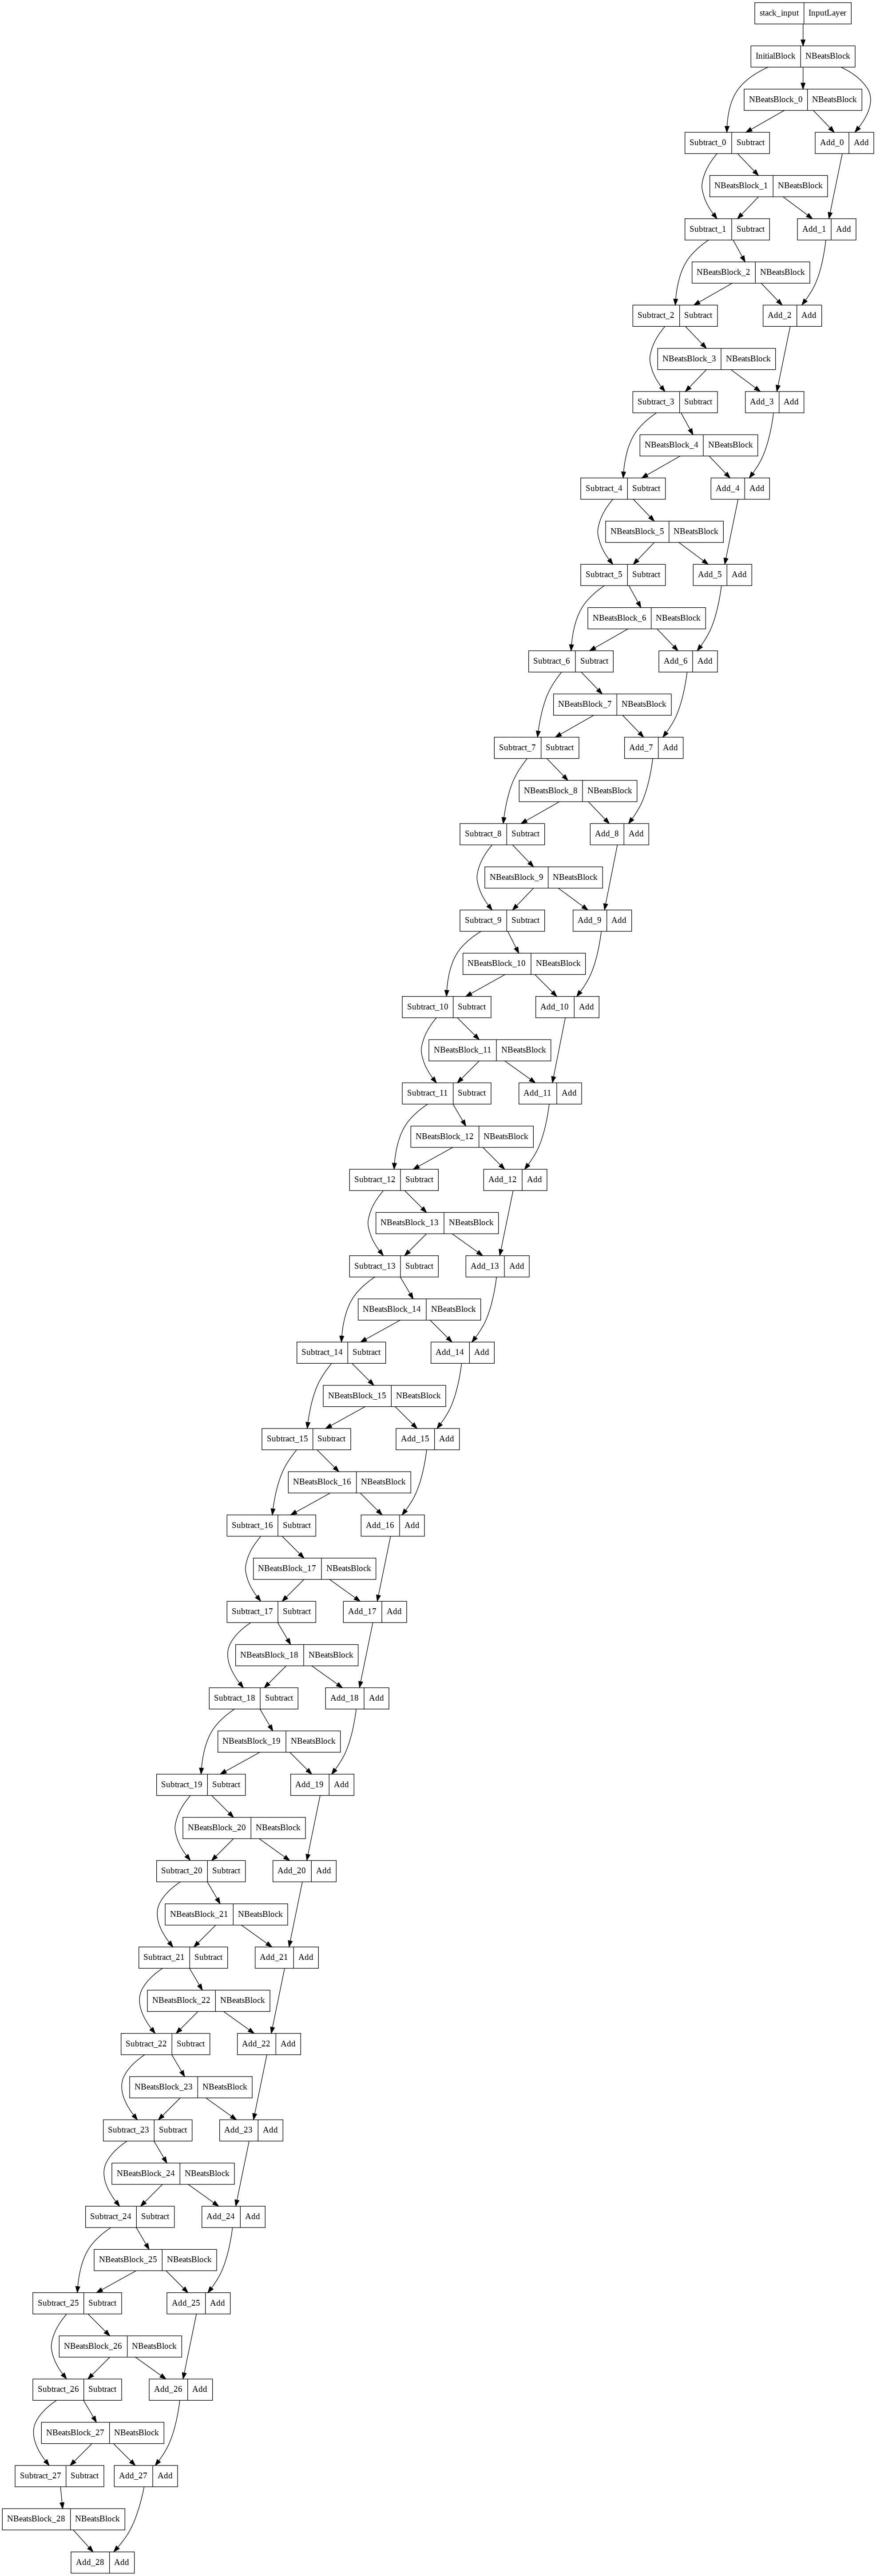

In [ ]:
# Plot the N-Beats model and inspect the architecure
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

### Model 8 : Creating an ensemble (stacking different models together)

An ensemble model leverages the wisdom of the crowd effect. 

It combines many different models to predict a common goal. 
Many competition winners on Kaggle use ensemble models

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

#### Constructing and fitting an ensemble of models

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10, 
                        num_epochs = 1000,
                        loss_fn = ['mae', 'mse', 'mape']):
  """
  Returns a list of num+iter models each trained on MAE, MSE, MAPE, 

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(loss_fn)
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # create num_iter number of models per loss function 
  for i in range(num_iter):
    # Build and fit a new model with different loss function 
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribtuion for estimating prediction intervals 
          layers.Dense(128, kernel_initializer='he_normal', activation = 'relu'),
          layers.Dense(128, kernel_initializer='he_normal', activation = 'relu'),
          layers.Dense(horizon)
      ])
      
      # Compile simple model with current loss function 
      model.compile(loss = loss_function, 
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", "mse"])
      
      #Fit the current model
      model.fit(train_data,
                epochs = num_epochs, 
                verbose = 0, 
                validation_data = test_data, 
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                   patience = 100, 
                                                                   verbose = 1)])
      # Append fitted model to list of ensemble model 
      ensemble_models.append(model)

  return ensemble_models


In [ ]:
%%time 
# Get list of trained ensemble models 
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)


Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 804: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 916: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 537: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 637: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 412: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 512: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [ ]:
ensemble_models

#### Make predictions with ensemble models

In [ ]:
# Create a function that uses a list of trained models to make and return a list of predictions 
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create list of ensemble predictions 
%%time 
ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data = test_dataset)
ensemble_preds

CPU times: user 619 ms, sys: 27.1 ms, total: 646 ms
Wall time: 666 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8802.509,  8773.465,  9039.8  , ..., 50248.73 , 49169.734,
        46492.617],
       [ 8768.62 ,  8728.693,  9009.116, ..., 49144.566, 48781.418,
        45588.727],
       [ 8745.424,  8733.034,  9101.386, ..., 49267.164, 47660.426,
        45370.047],
       ...,
       [ 8906.489,  8746.613,  9021.339, ..., 49364.395, 49242.062,
        46352.727],
       [ 8727.626,  8803.154,  9102.291, ..., 49582.34 , 48529.605,
        45036.78 ],
       [ 8815.881,  8760.732,  9040.146, ..., 49717.688, 48045.24 ,
        45825.656]], dtype=float32)>

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true = y_test, 
                                 y_pred = ensemble_preds)
ensemble_results

{'mae': 580.3021,
 'mse': 1181809.4,
 'rmse': 1087.1106,
 'mape': 2.6602716,
 'mase': 1.0194302}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8787.928, 8774.151, 9054.446, 8720.663, 8738.937, 8700.336,
       8663.838, 8475.682, 8446.302, 8519.801], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median

array([ 8785.189 ,  8773.465 ,  9040.146 ,  8712.821 ,  8738.183 ,
        8710.1   ,  8657.911 ,  8478.887 ,  8447.451 ,  8519.901 ,
        8197.665 ,  8098.032 ,  8044.2993,  7616.348 ,  7259.8887,
        7280.466 ,  7059.847 ,  7192.156 ,  7106.7417,  7530.3906,
        7380.8213,  7738.8   ,  7557.58  ,  7386.82  ,  7321.7603,
        7305.88  ,  7199.854 ,  7380.9575,  7495.356 ,  7533.302 ,
        7540.7446,  7332.015 ,  7231.558 ,  7176.5996,  7183.8467,
        7222.7124,  7078.855 ,  7098.1587,  6864.523 ,  6580.275 ,
        7394.746 ,  7157.9233,  7179.475 ,  7246.409 ,  7243.7676,
        7219.5103,  7212.0044,  7205.389 ,  7181.7407,  7210.195 ,
        7302.855 ,  7382.018 ,  7247.2446,  7172.403 ,  7162.3174,
        6943.515 ,  7273.4043,  7319.578 ,  7359.5654,  7717.6157,
        8055.954 ,  8127.623 ,  7860.625 ,  8086.361 ,  8099.475 ,
        8172.3887,  8091.4067,  8739.856 ,  8889.997 ,  8778.853 ,
        8941.909 ,  8956.263 ,  8672.811 ,  8630.657 ,  8684.0

In [ ]:
ensemble_mean_results = evaluate_preds(y_true = y_test, 
                                 y_pred = ensemble_mean)
ensemble_mean_results

{'mae': 567.76544,
 'mse': 1145083.6,
 'rmse': 1070.0858,
 'mape': 2.5842612,
 'mase': 0.9974066}

In [ ]:
ensemble_median_results = evaluate_preds(y_true = y_test, 
                                 y_pred = ensemble_median)
ensemble_median_results

{'mae': 566.7409,
 'mse': 1143587.8,
 'rmse': 1069.3866,
 'mape': 2.5809479,
 'mase': 0.9956068}

#### Plotting the prediction intervals (uncertainty estimates) of our ensemble model

So far we've been making point predictions with our models. 
E.g. a single prediction of tomorrow's price is 50,000.

Instead let's create a range of possible values such as 48,000 to 52,000 USD based on uncertainty. 

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method: 
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions 
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1) 

In [ ]:
# Find the lower and upper bounds of ensemble preictions 
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models
  # 2. Measure the standard deviation of the predictions 
  std = tf.math.reduce_std(preds, axis =0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval 
lower, upper = get_upper_lower(preds = ensemble_preds)
lower[:1], upper[:1]

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([8701.6455], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([8874.21], dtype=float32)>)

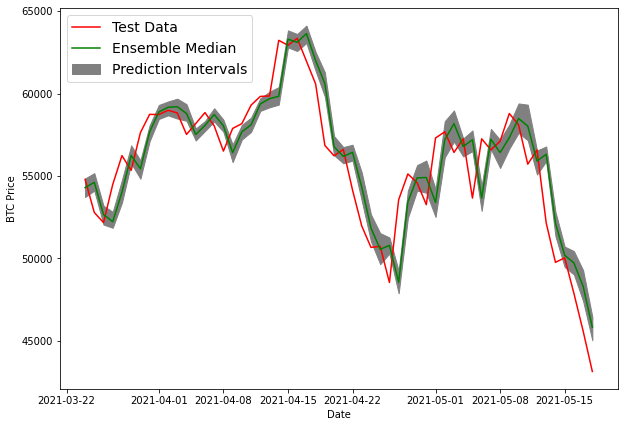

In [ ]:
# Plot our ensemble preds along with the prediction intervals(where the predictions fall between)
offset = 500 
plt.figure(figsize = (10,7))
plt.plot(X_test.index[offset:], y_test[offset:], '-', label = "Test Data", color = 'red' )
plt.plot(X_test.index[offset:], ensemble_median[offset:], '-', label = 'Ensemble Median', color = 'green')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:],
                 (upper)[offset:], label = "Prediction Intervals",
                 color = 'grey')
plt.legend(loc = 'upper left', fontsize = 14);

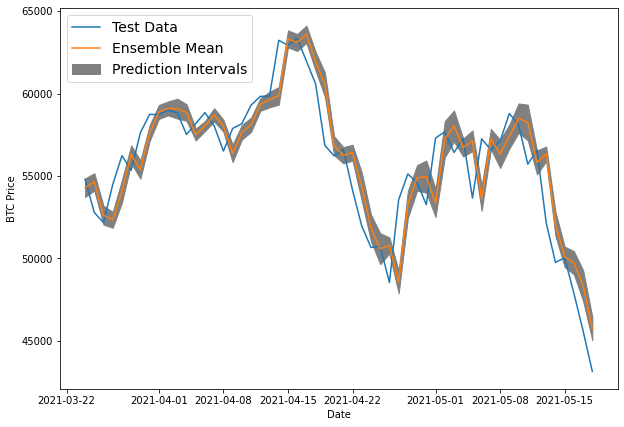

In [ ]:
# Plot our ensemble preds along with the prediction intervals(where the predictions fall between)
offset = 500 
plt.figure(figsize = (10,7))
plt.plot(X_test.index[offset:], y_test[offset:], '-', label = "Test Data" )
plt.plot(X_test.index[offset:], ensemble_mean[offset:], '-', label = 'Ensemble Mean')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:],
                 (upper)[offset:], label = "Prediction Intervals", color = 'grey')
plt.legend(loc = 'upper left', fontsize = 14);

So far all of our models predictions have been lagging behind the test data. 

As if they're replicating what the naive model does and just predict the previous timestep as the next timestep

#####Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates seek out to qualitatively and quantitatively answer the questions:

What can my model know? (with perfect data, what's possible to learn?)
What doesn't my model know? (what can a model never predict?)
There are two types of uncertainty in machine learning you should be aware of:

**Aleatoric uncertainty** - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.

**Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.

If you ignore the uncertanties, are you really going to get a reliable prediction?

### Model 9 : Future Prediction Model

 Train a model on the full historical data to make predictions into the future 
 
 So so far our models have predicted on the test datset, however, this is only a pseudofuture.Let's build a model which is capable of predicting into the future. 

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price +1,Price +2,Price +3,Price +4,Price +5,Price +6,Price +7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
# Train model on entire data to make predictions for the next day 
x_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy() 
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
x_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch 
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation= 'relu'),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(HORIZON)
])

# Compile 
model_9.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

# Fit the model 
model_9.fit(dataset_all, 
            epochs = 100, 
            verbose = 0)

#### Make predictions into the future

In [ ]:
# How many timesteps to predict into the future 
INTO_FUTURE = 14

To make predictions into the future we want a function which 
1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the futurue to predict (our `INTO_FUTUURE`)
  * the window size the model was trained on (`WINDOW_SIZE`) 
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values 
3. Loop `INTO_FUTURE` times makine a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the last prediction

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future =INTO_FUTURE, window_size = WINDOW_SIZE) -> list:
  """ 
  Make future forecasts into_future steps after values end. 
  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts / prepare data to forecast on 
  future_forecast = []
  last_window = values[-window_size:]

  # 3. Make INTO_FUTURE number of predictions, alternating the data which gets predicted on each 
  for _ in range(INTO_FUTURE):
    # predict on the last window then append it again, again, again (our model will eventually start to make forecast on its own forecast)
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on :\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()} \n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update the last window with new pred and get WINDOW_SIZE most recent preds ( model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecast


In [ ]:
# Make forecasts into the future 
future_forecast = make_future_forecasts(values = y_all, 
                                        model = model_9)

Predicting on :
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.47265625 

Predicting on :
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.47265625] -> Prediction: 50985.9296875 

Predicting on :
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.47265625 50985.9296875 ] -> Prediction: 48522.9609375 

Predicting on :
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.47265625 50985.9296875  48522.9609375 ] -> Prediction: 48137.19921875 

Predicting on :
 [47885.62525472 45604.61575361 43144.47129086 55764.47265625
 50985.9296875  48522.9609375  48137.19921875] -> Prediction: 47880.6328125 

Predicting on :
 [45604.61575361 43144.47129086 55764.47265625 50985.9296875
 48522.9609375  48137.19921875 47880.6328125 ] -> Prediction: 46879.71484375 

Predicting on :
 [43144.47129086 55764.47265625 50985.9296875 

#### Plot future forecast

In [ ]:
future_forecast

[55764.473,
 50985.93,
 48522.96,
 48137.2,
 47880.633,
 46879.715,
 48227.594,
 53963.684,
 49685.543,
 47596.176,
 48114.418,
 48807.996,
 48623.85,
 50178.715]

In [ ]:
def get_future_dates(start_date, into_future = INTO_FUTURE, offset =1):
  """
  Returns arrau pf datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date 
  end_date = start_date + np.timedelta64(into_future, 'D') # specify end date
  return np.arange(start_date, end_date, dtype= 'datetime64[D]') # return a date range between start and end date 
  

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.473, 50985.93 , 48522.96 , 48137.2  , 47880.633,
        46879.715, 48227.594, 53963.684, 49685.543, 47596.176, 48114.418,
        48807.996, 48623.85 , 50178.715], dtype=float32))

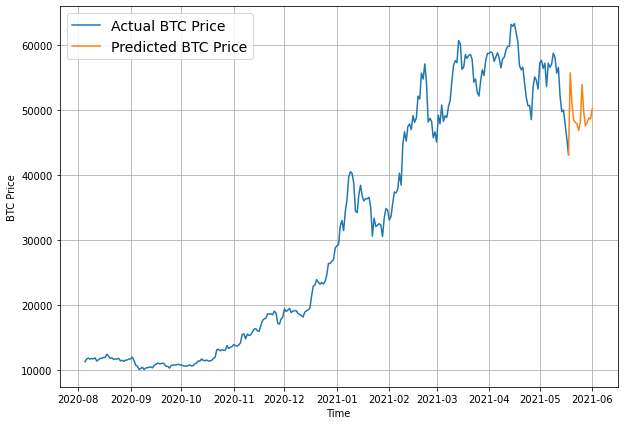

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

### Model 10 : Turkey Model 

The turkey problem is the hypothesis that an event could occur which not historical data gives precident for. 

E.g. 1000 normal historical days  -> 1 day where value hits 0 or value sky rockets

In [ ]:
# Let's introduce the turkey problem to the btc data 
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] /100

In [ ]:
# Manufacture an extra price on the end 
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

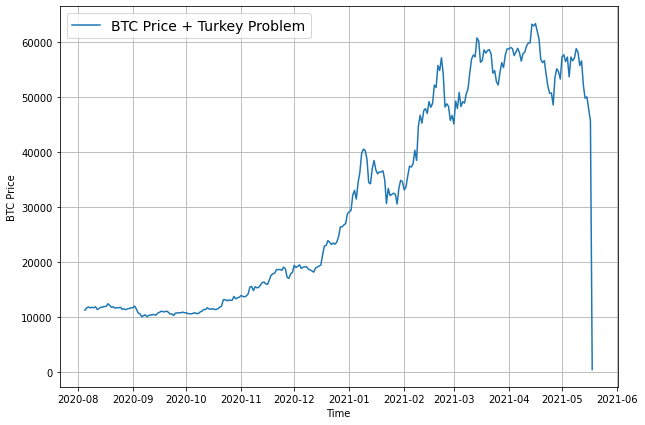

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = btc_timesteps_turkey,
                 values = btc_price_turkey, 
                 format = '-',
                 label = 'BTC Price + Turkey Problem', 
                 start = 2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_window(np.array(btc_price_turkey), window_size = WINDOW_SIZE, horizon = HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

#### Building and predicting on turkey data

In [ ]:
# Clone model 1 architecture and fit the turkey model on the turkey data 
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'model_10_turkey_model'
turkey_model.compile(loss = 'mae', 
                     optimizer = tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs = 100,
                 verbose = 0, 
                 batch_size = 128, 
                 validation_data = (X_test, y_test),
                 callbacks = [create_model_checkpoint(model_name = turkey_model.name)])


In [ ]:
# Evaluate the model predictions 
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 683.6693


683.6693115234375

In [ ]:
# Load best performing turkey model 
turkey_model = tf.keras.models.load_model('model_experiments/model_10_turkey_model')
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 649.7197


649.7197265625

In [ ]:
# Make predictions with turkey model 
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8856.717, 8755.528, 9025.789, 8755.844, 8725.874, 8750.886,
       8695.318, 8469.948, 8474.646, 8516.994], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true = y_test,
                                y_pred = turkey_preds)
turkey_results

{'mae': 17130.621,
 'mse': 614511550.0,
 'rmse': 24789.344,
 'mape': 121.37146,
 'mase': 26.509687}

In [ ]:
model_1_results

{'mae': 568.9511,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.99948955}

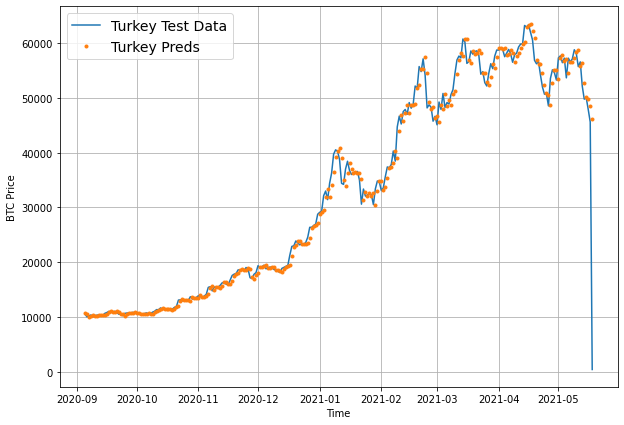

In [ ]:
plt.figure(figsize = (10, 7))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(y_test):],
                 format = '-',
                 label = 'Turkey Test Data',start = offset)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = turkey_preds,
                 label = "Turkey Preds",
                 start = offset)

#### Compare models

In [ ]:
# Compare different model results (w = window , h = horizon)
model_results = pd.DataFrame({"Naive model ": naive_results,
                              "Model 1 Dense W:7 H:1": model_1_results,
                              "Model 2 Dense W:30 H:1": model_2_results,
                              "Model 3 Dense W:30 H:7": model_3_results,
                              "Model 4 Conv 1D": model_4_results,
                              "Model 5 LSTM": model_5_results,
                              "Model 6 Multivariate": model_6_results,
                              "Model 7 N-Beats": model_7_results,
                              "Model 8 Ensemble": ensemble_results,
                              #"Model 9 Future Prediction": model_9_results,
                              "Model 10 Turkey": turkey_results}).T
model_results    

,mae,mse,rmse,mape,mase
Naive model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
Model 1 Dense W:7 H:1,568.951111,1.171744e+06,1082.471069,2.544898,0.999490
Model 2 Dense W:30 H:1,605.874084,1.273361e+06,1128.432861,2.726445,1.059074
Model 3 Dense W:30 H:7,1237.506470,5.405198e+06,2324.908203,5.558879,2.202073
Model 4 Conv 1D,570.738770,1.183500e+06,1087.887817,2.546120,1.002630
Model 5 LSTM,574.052917,1.185426e+06,1088.772705,2.584772,1.008452
Model 6 Multivariate,567.889893,1.164816e+06,1079.266602,2.546076,0.997625
Model 7 N-Beats,573.720886,1.185666e+06,1088.883057,2.577640,1.007869
Model 8 Ensemble,580.302124,1.181809e+06,1087.110596,2.660272,1.019430
Model 10 Turkey,17130.621094,6.145116e+08,24789.343750,121.371460,26.509687


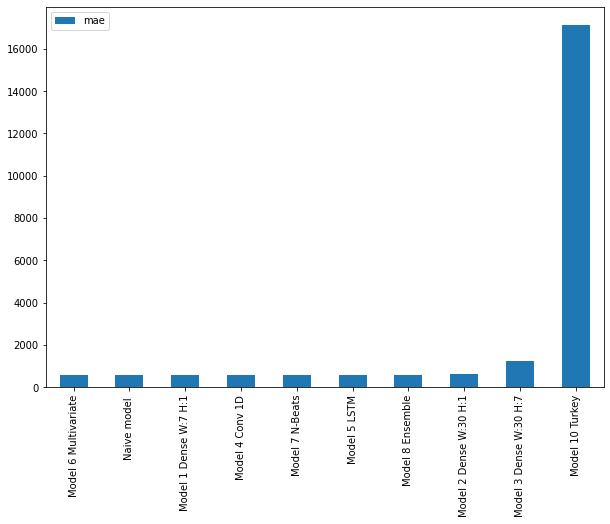

In [ ]:
# Sort model results by mae and plot them 
model_results[['mae']].sort_values(by = 'mae').plot(figsize = (10,7), kind = 'bar')